In [151]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [152]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/prueba/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/prueba/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
        train=pd.concat([train,temp])

In [153]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[tax bill, originally sold, little known, know...","[Baikalfinansgroup, Rosneft]",1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[tax bill, originally sold, little known, know...","[Yuganskneftegaz cost, Yuganskneftegaz cost 27...",0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[Loraine, Loraine, London, United Kingdom]",[London],1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[town girl, followed earlier, earlier films, f...","[Sennett, Extra Girl was produced Sennett ]",0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,0,0,...,"[bus collision, Uganda]","[bus collision, Uganda]",1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,0,0,...,"[grading papers, understand answers, answers w...","[Haque, Haque wants to include English in some...",0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,0,0,...,"[South African, African iron, steel manufactur...","[South African, African steel, steel manufactu...",0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,0,0,...,"[Critics said, main qualification, high school...","[NCEA, NCEA has been degraded authority ]",0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[pleaded guilty, aggravated assault, obstruct ...",[Tyler Jackson],1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


<Axes: title={'center': 'Jaro-Winkler_contra'}, xlabel='clases'>

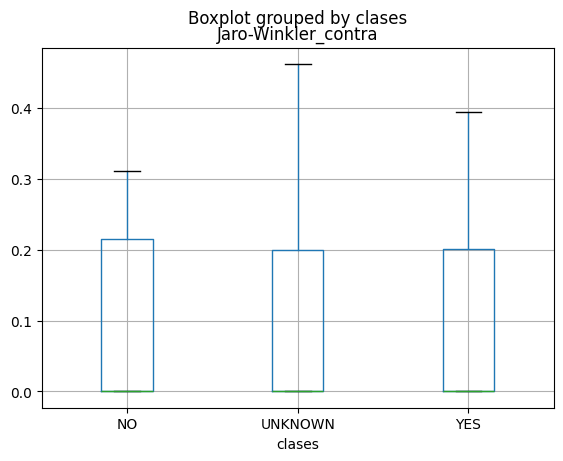

In [154]:
train.boxplot(by="clases",column="Jaro-Winkler_contra")

## Eliminar características

In [155]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.333333,0.000000,0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.428571,0.000000,1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,0,0,...,0.000000,0.080000,1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,0,0,...,0.000000,0.038462,0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,0,0,...,0.090909,0.026316,0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,0,0,...,0.166667,0.031250,0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


In [156]:
#train["entropias"]=train["entropias"]/train["entropia_total"]

In [157]:
train=train.drop(["list_bigram","c1_estructura","c2_estructura","mearts","entropia_total","max_info","similitud_faltantes","list_trigram","list_cuatrigram","diferencias","list_m","list_M","list_T","list_rel_con"],axis=1)

In [158]:
#train["list_M"] = train["list_M"] / train["list_T"]
#train["list_m"] = train["list_m"] / train["list_M"]
#train["list_M"] = (train["list_M"] - train["list_m"])/train["list_T"]

In [159]:
#train=train.drop(["list_m","list_T"],axis=1)

In [160]:
train

,sumas,distancias,entropias,mutinf,list_comp,list_incomp,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,Jaro-Winkler_relacionadas,clases
0,0.000000,0.000000,0.000,0.000000e+00,0,0,1.0,0.605426,1.5,0.241085,0.389922,YES
1,0.000000,0.000000,0.000,0.000000e+00,1,1,0.0,0.547619,3.0,0.000000,0.468254,NO
2,0.000000,0.000000,0.000,0.000000e+00,1,1,1.0,0.587589,4.5,0.000000,0.587589,UNKNOWN
3,0.000000,0.000000,0.000,0.000000e+00,0,0,0.0,0.630592,1.5,0.000000,0.630592,YES
4,-0.221468,276.119690,1.132,2.044573e+00,0,0,1.0,0.569630,4.0,0.000000,0.569630,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.565,4.006609e+00,0,0,0.5,0.548077,3.5,0.000000,0.493590,UNKNOWN
796,2.915811,132.309708,1.688,3.952492e+00,0,0,0.6,0.590226,6.5,0.000000,0.525815,YES
797,0.000000,145.867004,0.000,1.521449e-12,0,0,0.0,0.546296,4.0,0.214120,0.451389,UNKNOWN
798,0.000000,0.000000,0.000,0.000000e+00,0,0,1.0,0.543771,4.0,0.000000,0.402357,NO


In [161]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [162]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [163]:
train_m

,sumas,distancias,entropias,mutinf,list_comp,list_incomp,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,Jaro-Winkler_relacionadas
sumas,1.000000,0.379173,0.784413,0.751821,-0.021375,0.025489,-0.256717,-0.317719,0.022897,0.037619,-0.162515
distancias,0.379173,1.000000,0.560020,0.459983,0.170816,0.225537,-0.359667,-0.419031,0.105116,0.056333,-0.224069
entropias,0.784413,0.560020,1.000000,0.968785,0.015218,0.046331,-0.330922,-0.376076,-0.059129,-0.011225,-0.201567
mutinf,0.751821,0.459983,0.968785,1.000000,-0.025129,0.009642,-0.283181,-0.330558,-0.076779,-0.029395,-0.178091
list_comp,-0.021375,0.170816,0.015218,-0.025129,1.000000,0.680570,-0.208676,-0.177706,0.092514,0.139806,-0.083207
list_incomp,0.025489,0.225537,0.046331,0.009642,0.680570,1.000000,-0.224963,-0.240256,0.071303,0.166289,-0.132529
bi_ent_trip_rel,-0.256717,-0.359667,-0.330922,-0.283181,-0.208676,-0.224963,1.000000,0.474141,0.082535,0.007587,0.239240
Jaro-Winkler_rit,-0.317719,-0.419031,-0.376076,-0.330558,-0.177706,-0.240256,0.474141,1.000000,-0.010926,-0.033546,0.717814
c_estructura,0.022897,0.105116,-0.059129,-0.076779,0.092514,0.071303,0.082535,-0.010926,1.000000,0.160113,0.080870
Jaro-Winkler_contra,0.037619,0.056333,-0.011225,-0.029395,0.139806,0.166289,0.007587,-0.033546,0.160113,1.000000,0.035353


In [164]:
print(train_m.idxmin(),train_m.min())

sumas                        Jaro-Winkler_rit
distancias                   Jaro-Winkler_rit
entropias                    Jaro-Winkler_rit
mutinf                       Jaro-Winkler_rit
list_comp                     bi_ent_trip_rel
list_incomp                  Jaro-Winkler_rit
bi_ent_trip_rel                    distancias
Jaro-Winkler_rit                   distancias
c_estructura                           mutinf
Jaro-Winkler_contra          Jaro-Winkler_rit
Jaro-Winkler_relacionadas          distancias
dtype: object sumas                       -0.317719
distancias                  -0.419031
entropias                   -0.376076
mutinf                      -0.330558
list_comp                   -0.208676
list_incomp                 -0.240256
bi_ent_trip_rel             -0.359667
Jaro-Winkler_rit            -0.419031
c_estructura                -0.076779
Jaro-Winkler_contra         -0.033546
Jaro-Winkler_relacionadas   -0.224069
dtype: float64


<Axes: >

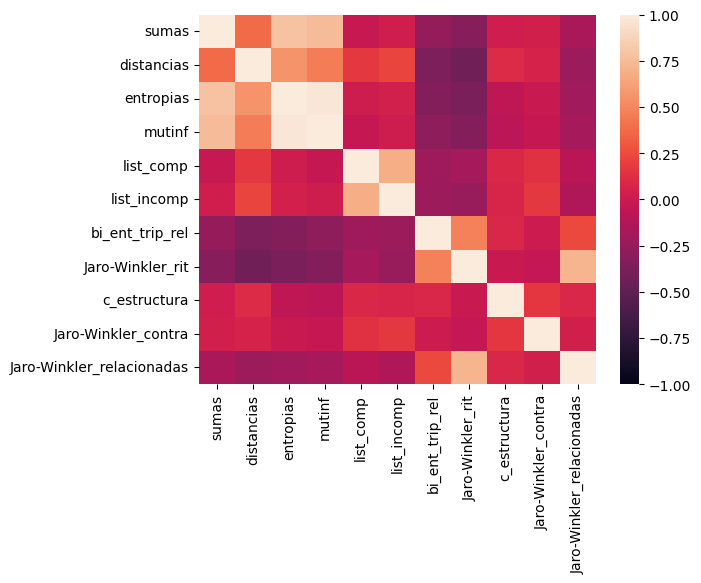

In [165]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [166]:
train_m

,sumas,distancias,entropias,mutinf,list_comp,list_incomp,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,Jaro-Winkler_relacionadas
sumas,1.000000,0.379173,0.784413,0.751821,-0.021375,0.025489,-0.256717,-0.317719,0.022897,0.037619,-0.162515
distancias,0.379173,1.000000,0.560020,0.459983,0.170816,0.225537,-0.359667,-0.419031,0.105116,0.056333,-0.224069
entropias,0.784413,0.560020,1.000000,0.968785,0.015218,0.046331,-0.330922,-0.376076,-0.059129,-0.011225,-0.201567
mutinf,0.751821,0.459983,0.968785,1.000000,-0.025129,0.009642,-0.283181,-0.330558,-0.076779,-0.029395,-0.178091
list_comp,-0.021375,0.170816,0.015218,-0.025129,1.000000,0.680570,-0.208676,-0.177706,0.092514,0.139806,-0.083207
list_incomp,0.025489,0.225537,0.046331,0.009642,0.680570,1.000000,-0.224963,-0.240256,0.071303,0.166289,-0.132529
bi_ent_trip_rel,-0.256717,-0.359667,-0.330922,-0.283181,-0.208676,-0.224963,1.000000,0.474141,0.082535,0.007587,0.239240
Jaro-Winkler_rit,-0.317719,-0.419031,-0.376076,-0.330558,-0.177706,-0.240256,0.474141,1.000000,-0.010926,-0.033546,0.717814
c_estructura,0.022897,0.105116,-0.059129,-0.076779,0.092514,0.071303,0.082535,-0.010926,1.000000,0.160113,0.080870
Jaro-Winkler_contra,0.037619,0.056333,-0.011225,-0.029395,0.139806,0.166289,0.007587,-0.033546,0.160113,1.000000,0.035353


In [167]:
# Checar variables colineales
#sns.relplot(data=train_m, x="list_bigram", y="list_cuatrigram")

In [168]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [169]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

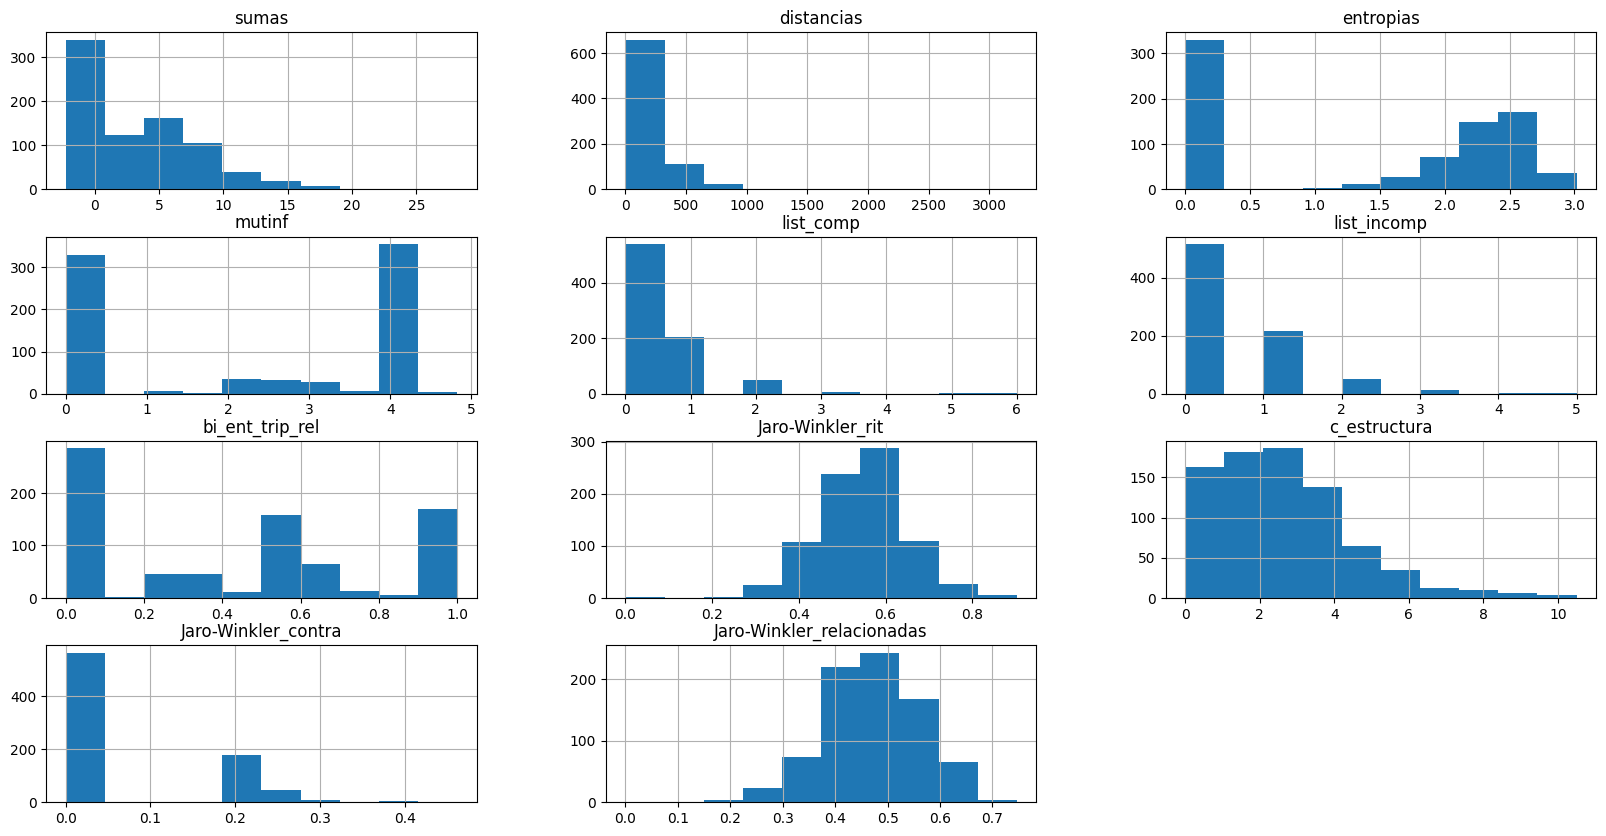

In [170]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [171]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/prueba/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        temp = pd.read_pickle('salida/prueba/GHS/GHS_'+str(i+1)+'.csv_.pickle')
        test=pd.concat([test,temp])

In [172]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.535,0.000,0.000000,0.000000,0.000000,1.000000,2,1,...,"[British firm, work scheme, solve chronic, chr...","[British firm, aid jobless, Israel]",0.666667,0.586420,3.5,0.00000,0.0,0.586420,3.5,ENTAILMENT
1,3.441459,2868.089844,2.675,2.619,3.316399,0.009668,0.356003,0.768742,1,0,...,[suspicious races],"[security department, unusual betting, betting...",0.000000,0.473893,5.0,0.00000,0.0,0.473893,5.0,NONENTAILMENT
2,5.280052,1194.567261,2.583,2.425,3.559684,0.002379,0.358144,0.623523,2,3,...,"[truth approaches, mental peak, Baker]","[closely tracks, rapid progress, hurdling rank...",0.250000,0.445286,2.0,0.00000,0.0,0.355387,1.5,NONENTAILMENT
3,0.000000,0.000000,2.696,0.000,0.000000,0.000000,0.000000,1.000000,2,1,...,"[premium rate, rate phone, phone services, tel...","[scrutinize regulation, premium rate, rate cal...",0.500000,0.640351,4.0,0.00000,0.0,0.521930,3.0,ENTAILMENT
4,2.223866,1779.916504,2.866,2.688,3.675601,0.003088,0.332273,0.516043,2,5,...,"[contain playful, quizzical words, Ben Somewhe...","[like form, texts reminded, early songs, brief...",0.000000,0.515694,5.0,0.00000,0.0,0.515694,5.0,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.552,2.150,2.802523,0.001959,0.227980,0.162765,3,3,...,"[expansion plans, chief executive, temporary b...","[joint venture, cable company, public service,...",0.125000,0.362915,5.0,0.00000,0.0,0.362915,5.0,NONENTAILMENT
796,7.477303,445.711975,2.801,2.839,4.002126,0.002690,0.462773,0.424251,0,0,...,"[possibly imminent, imminent indictment, war c...","[War crimes, crimes indictment, push teetering...",0.200000,0.502766,3.0,0.00000,0.0,0.502766,3.0,ENTAILMENT
797,3.317456,2417.119141,2.635,2.641,4.000118,0.002838,0.392823,0.541833,0,1,...,"[new season, season looms, Johnson, Johnson ci...","[different sort, championship titles, Johnson,...",0.166667,0.319713,3.5,0.00000,0.0,0.319713,3.5,NONENTAILMENT
798,3.948713,1132.847046,2.314,2.292,3.093504,0.002105,0.339266,0.624623,1,3,...,"[days later, forbidding razor, razor wire, rei...","[said yesterday, demonstrators arrived, main g...",0.000000,0.289686,3.0,0.18717,0.5,0.248680,2.0,NONENTAILMENT


In [173]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.535,0.000,0.000000,0.000000,0.000000,1.000000,2,1,...,0.0,0.000000,0.666667,0.586420,3.5,0.00000,0.0,0.586420,3.5,ENTAILMENT
1,3.441459,2868.089844,2.675,2.619,3.316399,0.009668,0.356003,0.768742,1,0,...,0.0,1.470588,0.000000,0.473893,5.0,0.00000,0.0,0.473893,5.0,NONENTAILMENT
2,5.280052,1194.567261,2.583,2.425,3.559684,0.002379,0.358144,0.623523,2,3,...,0.0,0.250000,0.250000,0.445286,2.0,0.00000,0.0,0.355387,1.5,NONENTAILMENT
3,0.000000,0.000000,2.696,0.000,0.000000,0.000000,0.000000,1.000000,2,1,...,0.2,0.000000,0.500000,0.640351,4.0,0.00000,0.0,0.521930,3.0,ENTAILMENT
4,2.223866,1779.916504,2.866,2.688,3.675601,0.003088,0.332273,0.516043,2,5,...,0.0,1.133333,0.000000,0.515694,5.0,0.00000,0.0,0.515694,5.0,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.552,2.150,2.802523,0.001959,0.227980,0.162765,3,3,...,0.0,0.285714,0.125000,0.362915,5.0,0.00000,0.0,0.362915,5.0,NONENTAILMENT
796,7.477303,445.711975,2.801,2.839,4.002126,0.002690,0.462773,0.424251,0,0,...,0.0,0.068182,0.200000,0.502766,3.0,0.00000,0.0,0.502766,3.0,ENTAILMENT
797,3.317456,2417.119141,2.635,2.641,4.000118,0.002838,0.392823,0.541833,0,1,...,0.0,0.566667,0.166667,0.319713,3.5,0.00000,0.0,0.319713,3.5,NONENTAILMENT
798,3.948713,1132.847046,2.314,2.292,3.093504,0.002105,0.339266,0.624623,1,3,...,0.0,0.243243,0.000000,0.289686,3.0,0.18717,0.5,0.248680,2.0,NONENTAILMENT


In [174]:
#test["entropias"]=test["entropias"]/test["entropia_total"]

In [175]:
test=test.drop(["list_bigram","c1_estructura","c2_estructura","mearts","entropia_total","max_info","similitud_faltantes","list_trigram","list_cuatrigram","diferencias","list_m","list_M","list_T","list_rel_con"],axis=1)
test

,sumas,distancias,entropias,mutinf,list_comp,list_incomp,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,Jaro-Winkler_relacionadas,clases
0,0.000000,0.000000,0.000,0.000000,2,1,0.666667,0.586420,3.5,0.00000,0.586420,ENTAILMENT
1,3.441459,2868.089844,2.619,3.316399,1,0,0.000000,0.473893,5.0,0.00000,0.473893,NONENTAILMENT
2,5.280052,1194.567261,2.425,3.559684,2,3,0.250000,0.445286,2.0,0.00000,0.355387,NONENTAILMENT
3,0.000000,0.000000,0.000,0.000000,2,1,0.500000,0.640351,4.0,0.00000,0.521930,ENTAILMENT
4,2.223866,1779.916504,2.688,3.675601,2,5,0.000000,0.515694,5.0,0.00000,0.515694,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.150,2.802523,3,3,0.125000,0.362915,5.0,0.00000,0.362915,NONENTAILMENT
796,7.477303,445.711975,2.839,4.002126,0,0,0.200000,0.502766,3.0,0.00000,0.502766,ENTAILMENT
797,3.317456,2417.119141,2.641,4.000118,0,1,0.166667,0.319713,3.5,0.00000,0.319713,NONENTAILMENT
798,3.948713,1132.847046,2.292,3.093504,1,3,0.000000,0.289686,3.0,0.18717,0.248680,NONENTAILMENT


In [176]:
#test["list_M"] = test["list_M"] / test["list_T"]
#test["list_m"] = test["list_m"] / test["list_M"]
#test["list_M"] = (test["list_M"] - test["list_m"])/test["list_T"]

In [177]:
test

,sumas,distancias,entropias,mutinf,list_comp,list_incomp,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,Jaro-Winkler_relacionadas,clases
0,0.000000,0.000000,0.000,0.000000,2,1,0.666667,0.586420,3.5,0.00000,0.586420,ENTAILMENT
1,3.441459,2868.089844,2.619,3.316399,1,0,0.000000,0.473893,5.0,0.00000,0.473893,NONENTAILMENT
2,5.280052,1194.567261,2.425,3.559684,2,3,0.250000,0.445286,2.0,0.00000,0.355387,NONENTAILMENT
3,0.000000,0.000000,0.000,0.000000,2,1,0.500000,0.640351,4.0,0.00000,0.521930,ENTAILMENT
4,2.223866,1779.916504,2.688,3.675601,2,5,0.000000,0.515694,5.0,0.00000,0.515694,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.150,2.802523,3,3,0.125000,0.362915,5.0,0.00000,0.362915,NONENTAILMENT
796,7.477303,445.711975,2.839,4.002126,0,0,0.200000,0.502766,3.0,0.00000,0.502766,ENTAILMENT
797,3.317456,2417.119141,2.641,4.000118,0,1,0.166667,0.319713,3.5,0.00000,0.319713,NONENTAILMENT
798,3.948713,1132.847046,2.292,3.093504,1,3,0.000000,0.289686,3.0,0.18717,0.248680,NONENTAILMENT


In [178]:
#test=test.drop(["list_m","list_T"],axis=1)

In [179]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [180]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [181]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [182]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [183]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [184]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [185]:
X_train.shape

(800, 11)

In [186]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [187]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [188]:
model.decision_function(X)

array([ 8.85756046e-01, -1.78886456e-01,  1.36381645e+00,  3.92291089e-01,
        9.83743590e-01,  8.31975688e-01,  2.61574540e-01,  5.24083522e-01,
        6.42153414e-03, -5.92696183e-01,  7.96523076e-02,  1.44961244e+00,
        7.86430226e-01,  1.95327825e-01, -2.39220262e-01,  8.38238381e-01,
       -5.45430691e-02, -2.70301739e-01, -1.19154452e-01,  4.48218779e-01,
        1.11512765e+00, -3.02907654e-01,  2.73671089e-01,  3.81008193e-01,
        5.76834828e-01,  1.03365329e+00,  1.06859632e+00,  3.47966162e-01,
        2.83907120e-01,  4.23196207e-01,  4.06656762e-01,  1.16746401e+00,
       -3.10240639e-01,  8.55758306e-01,  2.48244822e-01, -3.39968263e-03,
        5.84585270e-01,  1.61405860e-01,  2.75658781e-01,  1.25202553e+00,
        3.77882634e-01,  6.16594492e-01,  1.24955397e+00,  4.72692552e-01,
       -2.90433566e-01, -2.92808990e-01,  6.60477875e-02,  8.90776049e-01,
        8.35349532e-01,  3.20057767e-01, -1.45410561e+00,  3.85735287e-01,
        1.04342479e-01,  

In [189]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropias', 'mutinf', 'list_comp',
       'list_incomp', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'c_estructura',
       'Jaro-Winkler_contra', 'Jaro-Winkler_relacionadas'],
      dtype='object')

In [190]:
model.classes_

array([0, 1])

In [191]:
model.coef_[0]

array([ 1.34350955, -1.88639649, -0.56138298, -0.22351595, -0.42653335,
       -0.79492126,  1.0731448 ,  2.4839002 ,  1.1161267 , -0.20467456,
        1.25185398])

In [192]:
coeficientes=model.coef_[0]

In [193]:
coeficientes

array([ 1.34350955, -1.88639649, -0.56138298, -0.22351595, -0.42653335,
       -0.79492126,  1.0731448 ,  2.4839002 ,  1.1161267 , -0.20467456,
        1.25185398])

In [194]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 Jaro-Winkler_rit 1 distancias


In [195]:
n_columns=train.shape[1]-1

In [196]:
n_columns

11

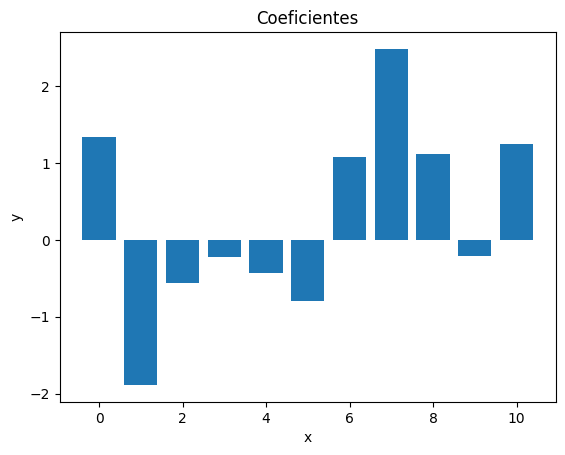

In [197]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [198]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [199]:
X_test.shape

(800, 11)

In [200]:
predictions = model.predict(X_test)

In [201]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[198 201]
 [ 31 370]]


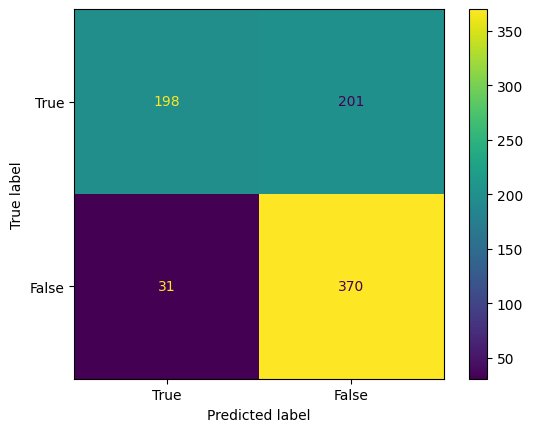

In [202]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrixR = metrics.confusion_matrix(predictions,y_test,labels=[1,0])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixR.T, display_labels = [True,False])
cm_display.plot()
plt.show() 

In [203]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.71
precision:  0.86
recall 0.5
f1_score:  0.63
matthews_score:  0.46


In [204]:
X_train.shape

(800, 11)

In [205]:
X_test.shape

(800, 11)

In [206]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [207]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
#X_train_cv=X_cv
#Y_train_cv=Y_cv
X_train_cv=X_test
Y_train_cv=y_test

In [208]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acuracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acuracy:: 0.940000 (0.035882)
Logistic Regression Precision:: 0.930000 (0.051833)
Logistic Regression Recall:: 0.970000 (0.039401)
Logistic Regression F1-score:: 0.950000 (0.030624)


In [217]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.880000 (0.066135)


In [218]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [219]:
#linear_model

In [220]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [221]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       401
           1       0.86      0.50      0.63       399

    accuracy                           0.71       800
   macro avg       0.76      0.71      0.70       800
weighted avg       0.76      0.71      0.70       800



In [222]:
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

[[198 201]
 [ 31 370]]


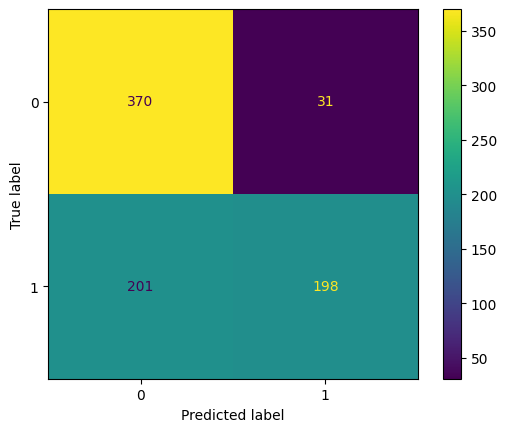

In [223]:
cm = confusion_matrix( y_test,y_predict)
ConfusionMatrixDisplay(cm).plot()

In [143]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [144]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropias', 'mutinf', 'list_comp',
       'list_incomp', 'list_bigram', 'bi_ent_trip_rel', 'Jaro-Winkler_rit',
       'c_estructura', 'Jaro-Winkler_contra', 'c1_estructura',
       'Jaro-Winkler_relacionadas', 'c2_estructura'],
      dtype='object')

In [145]:
explainer.expected_value

-0.12415810352398182

In [146]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.81871345,
        0.23333333],
       [0.26938368, 0.42965777, 0.88152137, ..., 0.        , 0.66161287,
        0.33333333],
       [0.41330145, 0.17895364, 0.81622349, ..., 0.        , 0.49616385,
        0.1       ],
       ...,
       [0.25967727, 0.36209955, 0.88892629, ..., 0.        , 0.44635868,
        0.23333333],
       [0.30908953, 0.16970756, 0.77145742, ..., 0.2       , 0.34718719,
        0.13333333],
       [0.16200571, 0.08235233, 0.75934029, ..., 0.        , 0.50415512,
        0.2       ]])

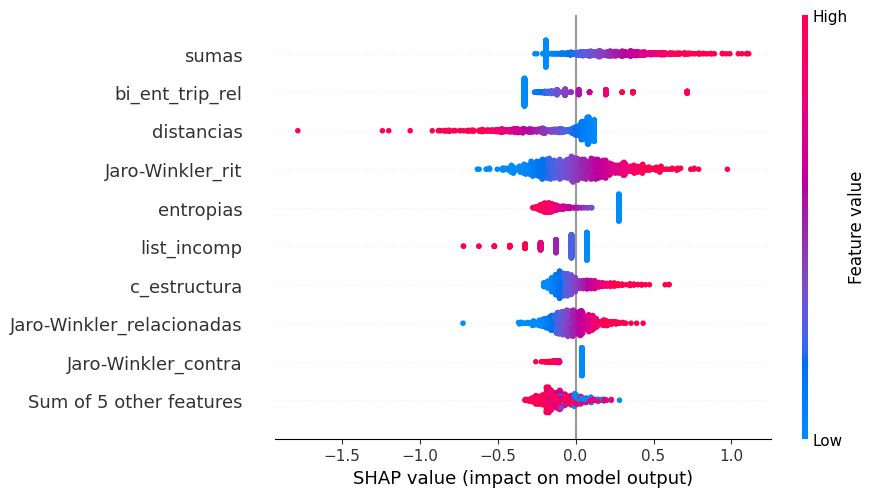

In [147]:
shap.plots.beeswarm(shap_values)

[0.34562646 0.30874362 0.92628745 0.81576057 0.125      0.125
 0.         0.14285714 0.60103937 0.375      0.50818579 0.2
 0.66180928 0.4       ] 0 0


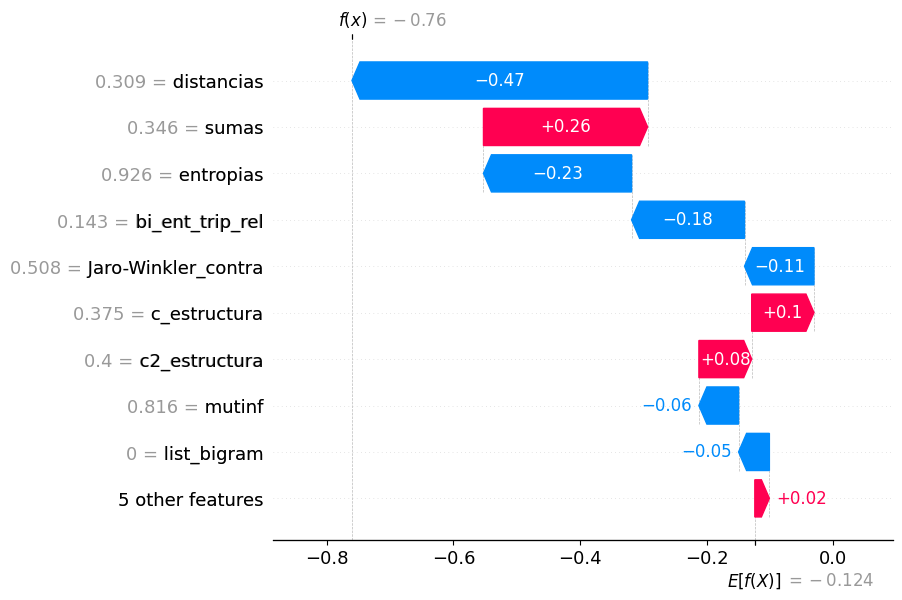

In [148]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [149]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.46178506 0.17369219 0.88791653 0.81912071 0.125      0.125
 0.         0.33333333 0.51924528 0.25       0.52885338 0.2
 0.52936288 0.23333333]


IndexError: index 1 is out of bounds for axis 2 with size 1

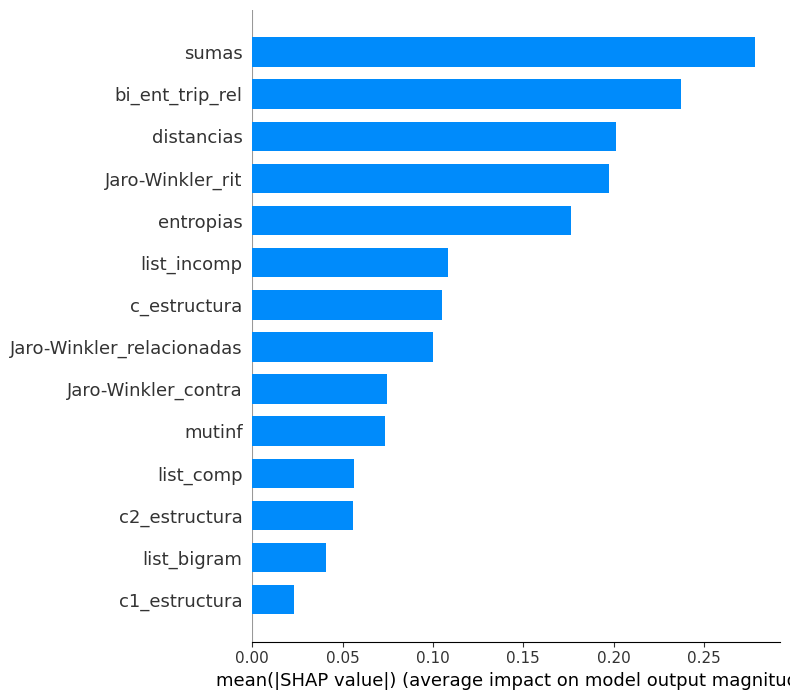

In [150]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

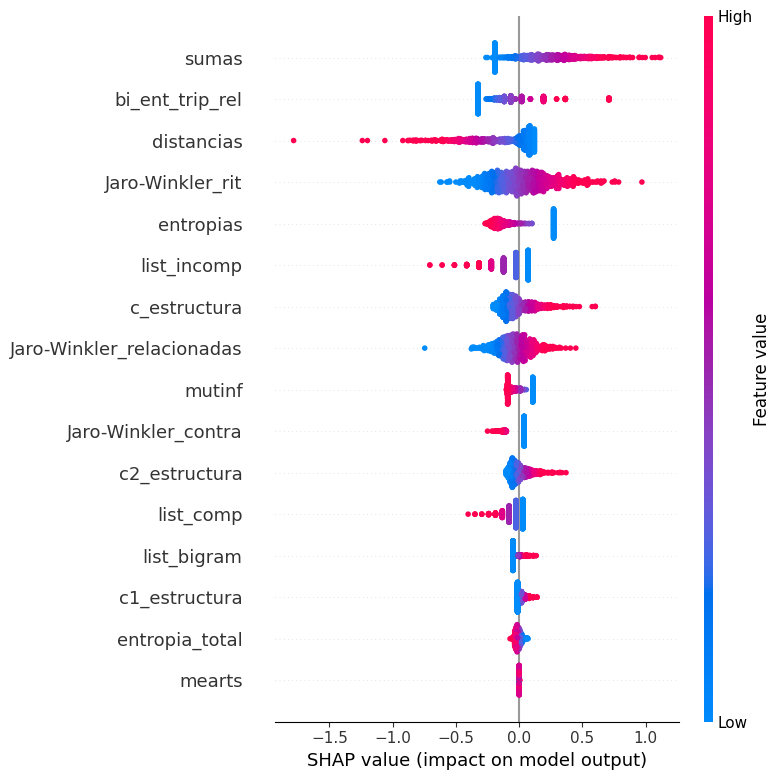

In [77]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

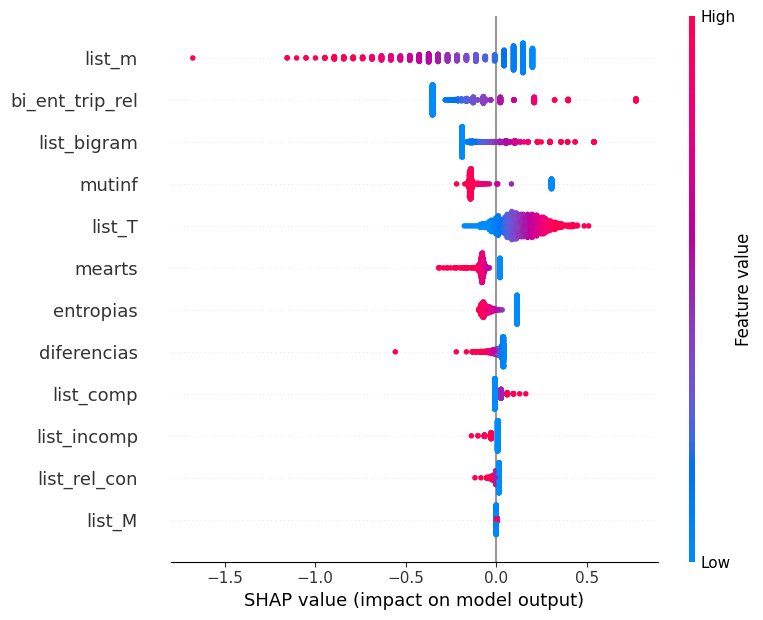

In [91]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

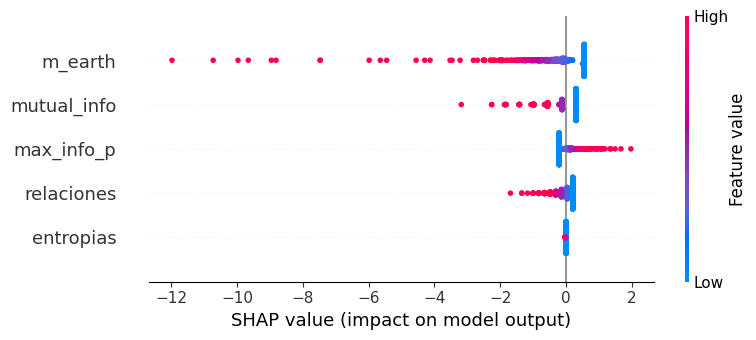

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


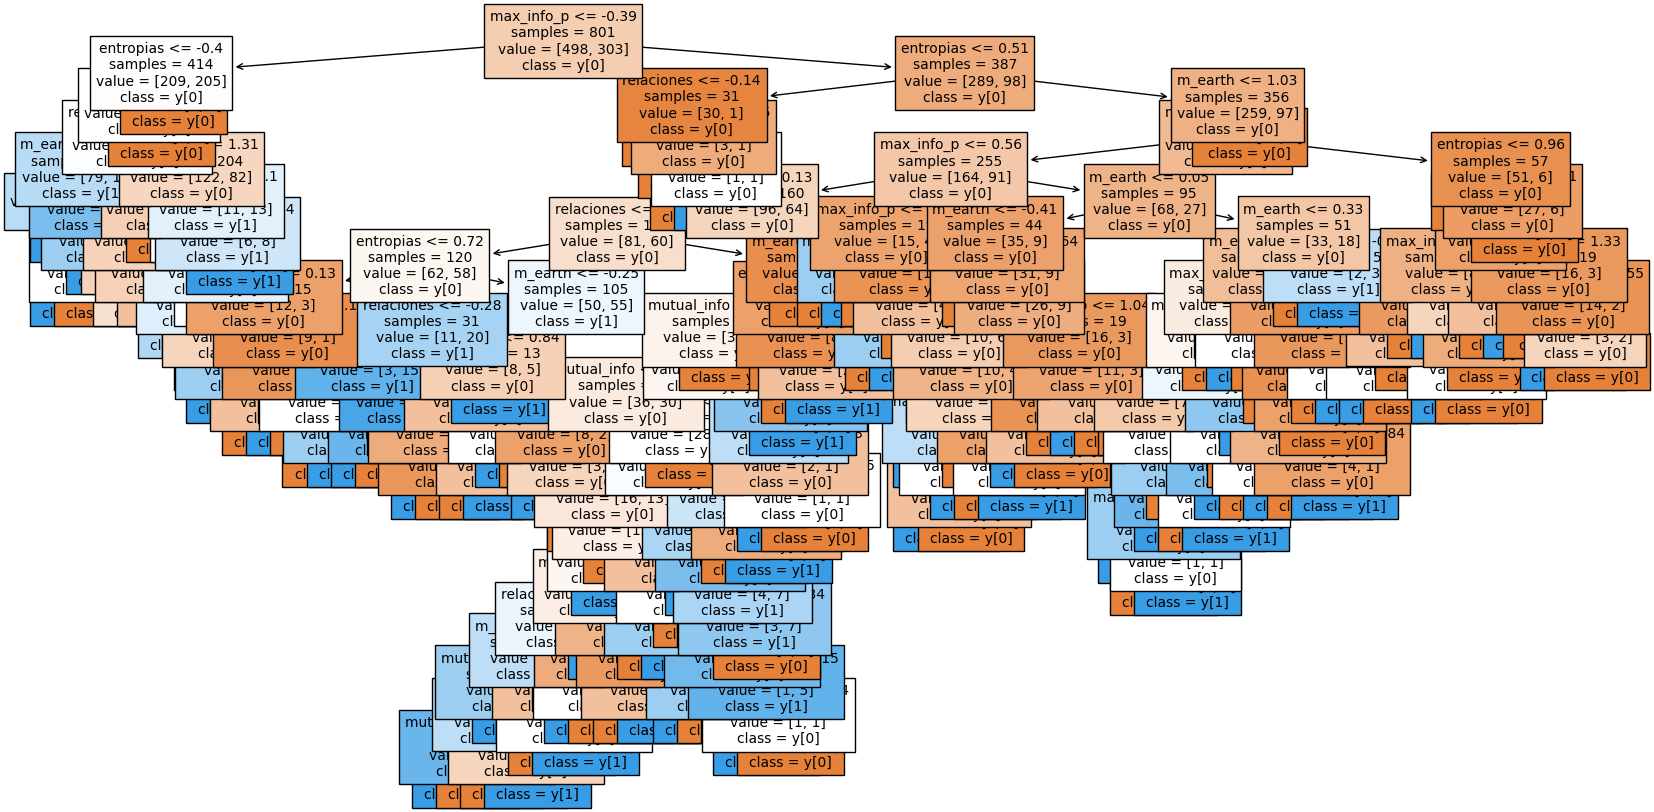

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )